# Gearbox Fault Diagnosis
## Data exploration and visualisation

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### RAW Data

In [32]:
#RAW data (in time domain)
raw_df = pd.read_csv('Processed_data_local/data_merged_no_fft.csv')
raw_df = raw_df.drop('Unnamed: 0',axis=1)

In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021119 entries, 0 to 2021118
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   a1       float64
 1   a2       float64
 2   a3       float64
 3   a4       float64
 4   load     int64  
 5   failure  int64  
dtypes: float64(4), int64(2)
memory usage: 92.5 MB


### a1, a2, a3, a4: values from sensors
### load: 0 -> 0%, 10 -> 10% ... 90 -> 90%
### failure: 0 - healthy, 1 - broken

In [33]:
raw_df.head()

,a1,a2,a3,a4,load,failure
0,-3.908160,0.032071,-1.09934,4.327950,50,0
1,-1.097430,-12.528500,1.14943,-5.023320,0,0
2,3.163500,3.039890,-1.81296,-2.172340,10,0
3,12.807400,-0.594837,1.97009,-1.335710,90,0
4,-0.037101,-5.327090,6.81424,-0.374183,30,1


In [34]:
temp_df = raw_df[:2000]

In [35]:
raw_df.corr()

,a1,a2,a3,a4,load,failure
a1,1.000000,-0.133958,-0.031938,0.029242,0.000643,-0.000384
a2,-0.133958,1.000000,-0.235082,0.278087,-0.000267,0.000332
a3,-0.031938,-0.235082,1.000000,-0.086522,0.001217,-0.000934
a4,0.029242,0.278087,-0.086522,1.000000,0.000991,0.000162
load,0.000643,-0.000267,0.001217,0.000991,1.000000,-0.005784
failure,-0.000384,0.000332,-0.000934,0.000162,-0.005784,1.000000


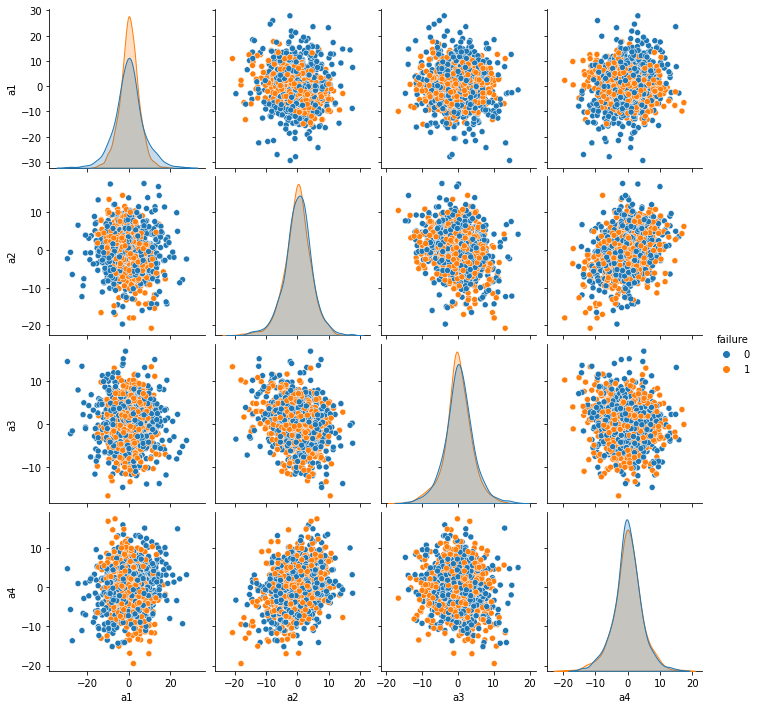

In [36]:
sns.pairplot(data=temp_df,hue='failure',x_vars = ['a1','a2', 'a3','a4'],
            y_vars = ['a1','a2', 'a3','a4'])

### Processed data (frequency domain)

In [38]:
#processed data
df = pd.read_csv('Processed_data/processed_and_shuffled_df.csv')
df = df.drop('Unnamed: 0',axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15789 entries, 0 to 15788
Columns: 262 entries, a1_freq_0 to failure
dtypes: float64(262)
memory usage: 31.6 MB


### Columns encoding

### a [ i ] _ freq _ [ j ]
### i (1,2,3,4) - number of sensor
### j (0,1,2 ... 64) - number of frequency (acc buffer size and time step)

In [42]:
df.head()

,a1_freq_0,a1_freq_1,a1_freq_2,a1_freq_3,a1_freq_4,a1_freq_5,a1_freq_6,a1_freq_7,a1_freq_8,a1_freq_9,...,a4_freq_57,a4_freq_58,a4_freq_59,a4_freq_60,a4_freq_61,a4_freq_62,a4_freq_63,a4_freq_64,load,failure
0,0.005101,1.247122,0.478911,0.137187,0.416799,0.452218,0.648994,0.428732,1.025357,2.115164,...,0.235110,1.070931,0.276280,0.662413,0.597808,0.308686,0.246427,0.208248,9.0,0.0
1,0.101887,1.300294,0.460277,0.508689,0.066402,0.143962,0.102928,0.252416,0.741350,0.906638,...,0.239470,0.093433,0.587990,0.170224,0.251937,0.194196,0.091358,0.172850,6.0,0.0
2,0.114595,0.608045,1.544988,0.133156,0.399378,0.552593,0.395670,0.383603,0.169256,0.211019,...,0.073918,0.184883,0.054254,0.379204,0.365445,0.113719,0.064615,0.119418,1.0,0.0
3,0.074220,0.706798,0.453239,0.093307,0.521446,0.532933,0.570955,0.428299,0.440809,2.020705,...,0.356629,0.291972,0.537028,0.367629,0.229246,0.136271,0.173111,0.175452,2.0,1.0
4,0.169813,0.532547,0.877946,0.620596,0.767804,0.900650,0.397537,1.248088,1.579174,2.711628,...,0.235135,0.311891,0.202014,0.393056,0.180624,0.110899,0.046682,0.126975,8.0,1.0


In [44]:
temp_df2 = df[:2000]

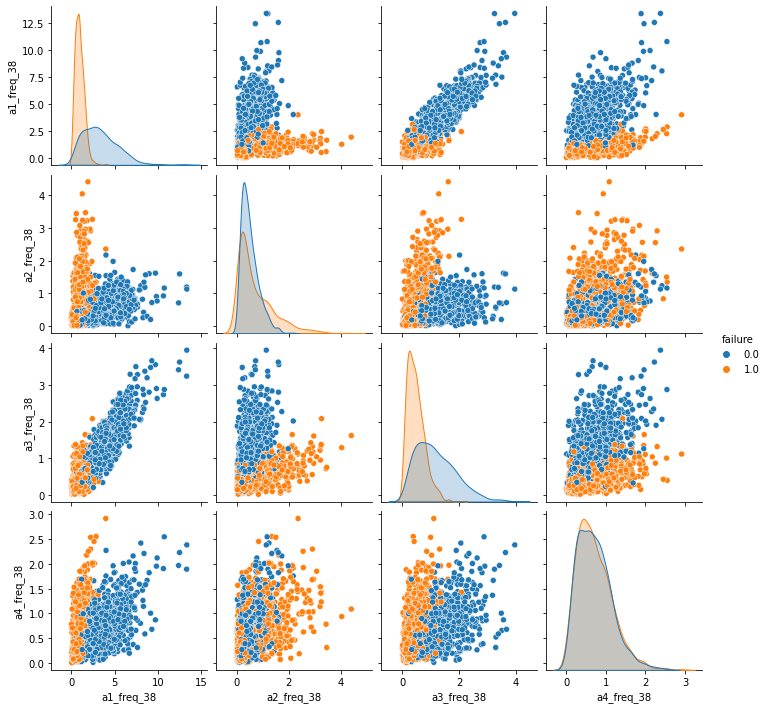

In [50]:
pair_x = ['a1_freq_10','a1_freq_20', 'a1_freq_37','a4_freq_60']
pair_y = ['a1_freq_38','a2_freq_38', 'a3_freq_38','a4_freq_38']

sns.pairplot(data=temp_df2, hue='failure', x_vars = pair_y, y_vars = pair_y)